In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
X = df.drop(columns = ['Species'])
y = df['Species'];

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 45)

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 40)
tree.fit(X_train,y_train)
y_train_predict = tree.predict(X_train)
y_test_predict = tree.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_predict),accuracy_score(y_test,y_test_predict))

1.0 1.0


In [28]:
path = tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.33284722])

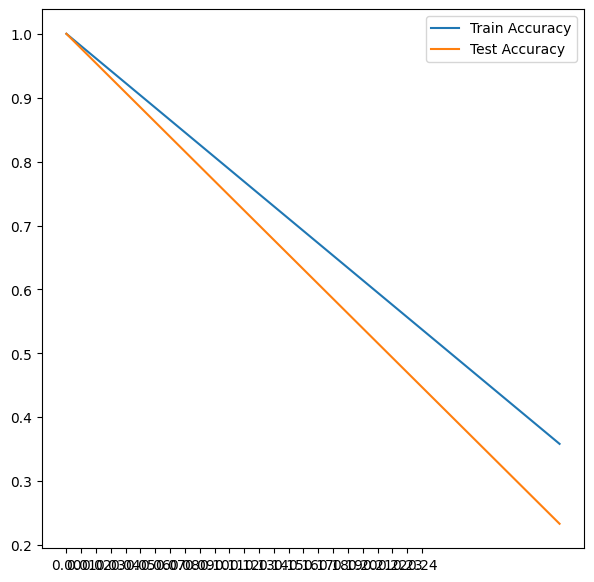

In [41]:
import matplotlib.pyplot as plt
accuracy_train, accuracy_test = [], []

for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X_train, y_train)
    y_train_predict = tree.predict(X_train)
    y_test_predict = tree.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_predict))
    accuracy_test.append(accuracy_score(y_test, y_test_predict))

plt.figure(figsize=(7, 7))
plt.plot(alphas, accuracy_train, label="Train Accuracy")
plt.plot(alphas, accuracy_test, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00, 0.25, 0.01))
plt.legend()
plt.show()
